PHASE 4 — DATA ANALYSIS 

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import seaborn as sn
import matplotlib.pyplot as plot
import os
#sn.set_theme(style="whitegrid")

In [2]:
load_dotenv()
db_url = os.getenv('DATABASE_URL')
engine =create_engine(db_url)

In [3]:
clean_retail_data_query ="select * from online_retail_data_set.online_retail_clean orc"
clean_retail_data = pd.read_sql(clean_retail_data_query,engine)

In [17]:
clean_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Year,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,2010,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010,1


In [18]:
clean_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Month', 'Year',
       'Day'],
      dtype='object')

In [4]:
year_dataset = clean_retail_data[clean_retail_data['Year']==2011]
revenuebymonth = (year_dataset.groupby('Month')['Revenue'].sum().sort_values(ascending=False))
revenuebymonth

Month
11    1156205.61
10    1035642.45
9      950686.30
5      677355.15
6      660046.05
8      644051.04
7      598962.90
3      594081.76
1      568101.31
12     517190.44
4      468374.33
2      446084.92
Name: Revenue, dtype: float64

<Axes: xlabel='Month', ylabel='Revenue'>

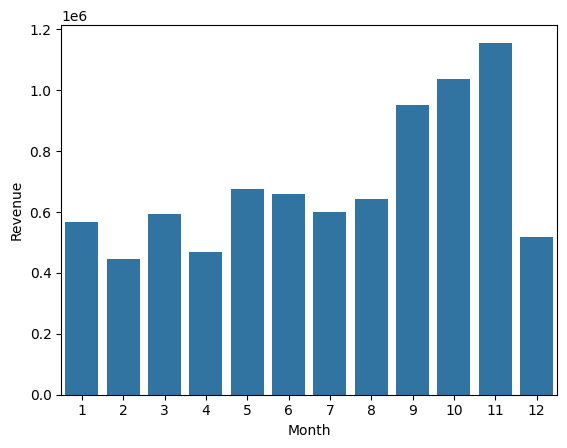

In [6]:
sn.barplot(data=revenuebymonth.reset_index(), x='Month', y='Revenue')


In [37]:
country_data_filter = clean_retail_data[clean_retail_data['Country'] !='United Kingdom']
#country_data_filter = country_data_filter.dropna(subset=['Revenue', 'Quantity'])

country_data_summary = (
    country_data_filter.groupby('Country')
    .agg(         total_rev=('Revenue', 'sum'),
        total_qty=('Quantity', 'sum')
    )     .reset_index() )
# country_data_filter
rank_country =country_data_summary.sort_values(by ='total_rev',ascending=False).head(10)
rank_country

,Country,total_rev,total_qty
23,Netherlands,285446.34,200937
10,EIRE,265262.46,140383
14,Germany,228678.40,119156
13,France,208934.31,111429
0,Australia,138453.81,84199
30,Spain,61558.56,27944
32,Switzerland,56443.95,30083
3,Belgium,41196.34,23237
31,Sweden,38367.83,36078
19,Japan,37416.37,26016


<Axes: xlabel='total_qty', ylabel='total_rev'>

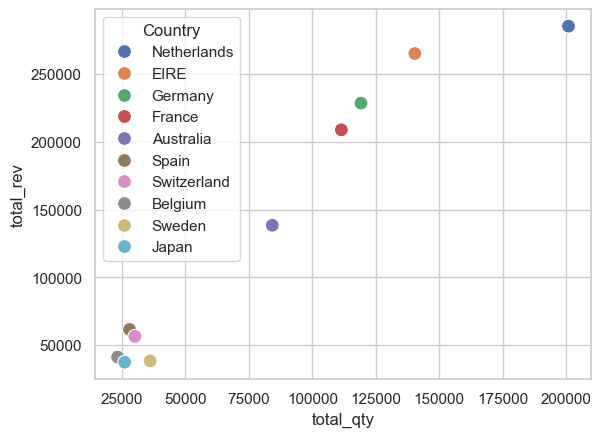

In [58]:
sn.scatterplot(data=rank_country, x="total_qty", y="total_rev", hue="Country", s=100)



In [25]:
country_data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43505 entries, 26 to 392730
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    43505 non-null  object        
 1   StockCode    43505 non-null  object        
 2   Description  43505 non-null  object        
 3   Quantity     43505 non-null  int64         
 4   InvoiceDate  43505 non-null  datetime64[ns]
 5   UnitPrice    43505 non-null  float64       
 6   CustomerID   43505 non-null  float64       
 7   Country      43505 non-null  object        
 8   Revenue      43505 non-null  float64       
 9   Month        43505 non-null  int64         
 10  Year         43505 non-null  int64         
 11  Day          43505 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 4.3+ MB


In [62]:
customer_summary = (clean_retail_data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10))
customer_summary

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Top 10 Customers by Revenue')

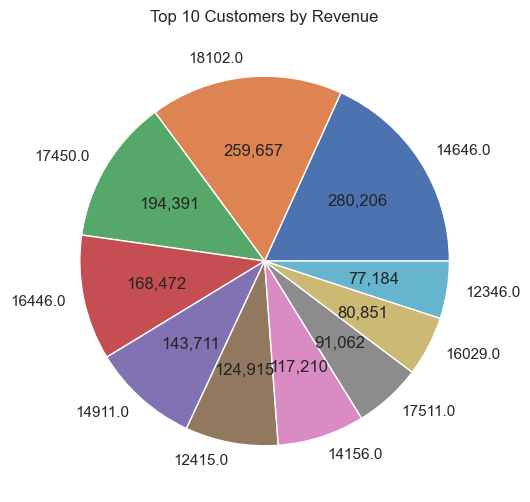

In [77]:
colors = sn.color_palette('deep')
plot.figure(figsize=(6,6))
plot.pie(customer_summary, labels=customer_summary.index, colors=colors, autopct=lambda p: f'{p*customer_summary.sum()/100:,.0f}' );
plot.title("Top 10 Customers by Revenue")


In [87]:
product_summary =(country_data_filter.groupby('Country',as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10))
product_summary

,Country,Quantity
23,Netherlands,200937
10,EIRE,140383
14,Germany,119156
13,France,111429
0,Australia,84199
31,Sweden,36078
32,Switzerland,30083
30,Spain,27944
19,Japan,26016
3,Belgium,23237


<Axes: xlabel='Country', ylabel='Quantity'>

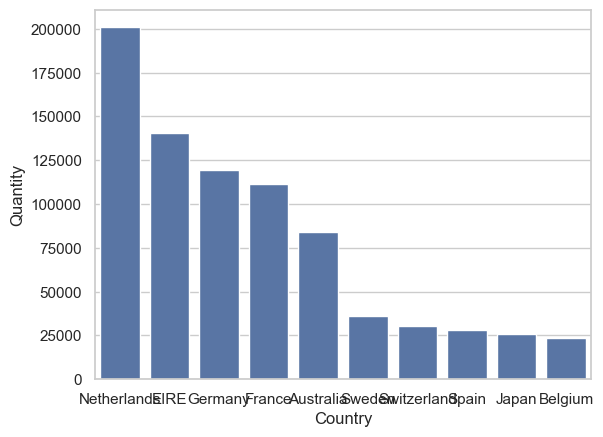

In [88]:
colors = sn.color_palette('deep')

sn.barplot(data=product_summary.reset_index(), x='Country', y='Quantity')
